## IBM Applied Data Science Capstone Project
### Week 5 
## Content in Notebook

1. Import libraries
2. Scrap data from webpage into a DataFrame
    1. Data Preprocessing
    2. Output as Prediction file ( .csv)
3. Define Foursquare Credentials and Version
4. Top 225 venues that are within a radius of 600 meters for each post office
    1. Data Preprocessing
    2. Output as Prediction file ( .csv)
5. Analyze Each Postal Office For Venue Category
6. List and display the top 5 existing facilities for each Pin Code
7. Exploratory Visualization 1
8. Feature Engineering for Business Problem
   1. Simplification  
   2. Feature Selection  
   3. Handling Categorical Data (One Hot Encoding)
9. Potential area for the development of different infrastructure 
10. Best place to stay with vital infrastructure facilities nearby
11. Clustering And Exploratory Visualization 2
12. Examine Clusters
13. Observations:
14. Acknowledgments

## 1. Import libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd
import folium
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
!conda install -c conda-forge lxml --yes
import requests
import lxml.html as lh
from sklearn.cluster import KMeans
print("Libraries imported.")

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0



geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Sol

## 2. Checking & Reading the 'mumbailatlong' file directly to avoid data scraping.

In [2]:
clean_df = pd.read_csv('mumbailatlong.csv',index_col='Unnamed: 0')
clean_df.head()

,City,Post Office,Pin Code,Latitude,Longitude
0,Mumbai,August Kranti Marg,400036,18.963549,72.809989
1,Mumbai,Aarey Milk Colony,400065,19.156129,72.870722
2,Mumbai,Andheri (East),400069,19.115883,72.854202
3,Mumbai,Andheri (West),400058,19.117249,72.833968
4,Mumbai,Antop Hill,400037,19.020761,72.865256


## OR Scrap data from webpage into a DataFrame

In [27]:
url='https://mumbai7.com/postal-codes-in-mumbai/'
#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')
r = requests.get(url)

#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))

size_of_col = 3
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 4, the //tr data is not from our table 
    if len(T)!=size_of_col:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1
        
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)
df

1:"City"
2:"Post Office"
3:"Pin Code"


,City,Post Office,Pin Code
0,Mumbai,August Kranti Marg,400036
1,Mumbai,Aarey Milk Colony,400065
2,Mumbai,Andheri (East),400069
3,Mumbai,Andheri (West),400058
4,Mumbai,Antop Hill,400037
...,...,...,...
152,Thane,Vasai East I/E,401208
153,Thane,Vasai Road East,401210
154,Thane,Vikramgad,401605
155,Thane,Virar,401303


## 3. Finding the latitude and longitude of each zip code

In [28]:
df["Latitude"] = ""
df["Longitude"] = ""
df.shape

(157, 5)

In [29]:
df.head()

,City,Post Office,Pin Code,Latitude,Longitude
0,Mumbai,August Kranti Marg,400036,,
1,Mumbai,Aarey Milk Colony,400065,,
2,Mumbai,Andheri (East),400069,,
3,Mumbai,Andheri (West),400058,,
4,Mumbai,Antop Hill,400037,,


In [30]:
df1 = df.loc[0:25]
df2 = df.loc[26:50]
df3 = df.loc[51:75]
df4 = df.loc[76:100]
df5 = df.loc[101:125]
df6 = df.loc[126:150]
df7 = df.loc[151:156]

In [31]:
# Need to drop those Neighborhood that the geocode does not find
to_drop_unknown = []
geolocator = Nominatim(user_agent="ny_explorer")
for index, row in df1.iterrows():
    address = row['Post Office'] + ', Mumbai'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        df1.loc[index, 'Latitude'] = latitude
        df1.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        to_drop_unknown.append(index)

The geograpical coordinate of August Kranti Marg, Mumbai are 18.9635489, 72.8099885.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


The geograpical coordinate of Aarey Milk Colony, Mumbai are 19.1561292, 72.8707223.
The geograpical coordinate of Andheri (East), Mumbai are 19.1158835, 72.854202.
The geograpical coordinate of Andheri (West), Mumbai are 19.1172495, 72.833968.
The geograpical coordinate of Antop Hill, Mumbai are 19.0207608, 72.8652556.
Cannot do: Anu Shakti Nagar, Mumbai, will drop index: 5
Cannot do: B A R C, Mumbai, will drop index: 6
The geograpical coordinate of Ballard Estate, Mumbai are 18.9366512, 72.8391325.
The geograpical coordinate of Bandra (East), Mumbai are 19.0616565, 72.8498111.
The geograpical coordinate of Bandra (West), Mumbai are 19.0583358, 72.8302669.
The geograpical coordinate of Bangur Nagar, Mumbai are 19.1688142, 72.8336777.
The geograpical coordinate of Barve Nagar, Mumbai are 19.0952831, 72.9001776.
The geograpical coordinate of Bhandup, Mumbai are 19.1438684, 72.9384327.
The geograpical coordinate of Bhandup (East), Mumbai are 19.1485568, 72.9470657.
Cannot do: Bhavani Shan

In [32]:
# Need to drop those Neighborhood that the geocode does not find
geolocator = Nominatim(user_agent="ny_explorer2")
for index, row in df2.iterrows():
    address = row['Post Office'] + ', Mumbai'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        df2.loc[index, 'Latitude'] = latitude
        df2.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        to_drop_unknown.append(index)

The geograpical coordinate of Dadar, Mumbai are 19.019282, 72.8428757.
The geograpical coordinate of Dahisar, Mumbai are 19.2494501, 72.8596206.
The geograpical coordinate of Delisle Road, Mumbai are 18.9932602, 72.8310115.
The geograpical coordinate of Dharavi, Mumbai are 19.044463, 72.8586177.
The geograpical coordinate of F C I Mumbai, Mumbai are 18.9387711, 72.8353355.
The geograpical coordinate of Ghatkopar (West), Mumbai are 19.0897194, 72.9045972.
The geograpical coordinate of Girgaon, Mumbai are 18.9543165, 72.8179082.
The geograpical coordinate of Goregaon (East), Mumbai are 19.1692623, 72.8552548.
The geograpical coordinate of Goregaon (West), Mumbai are 19.1633281, 72.8411995.
The geograpical coordinate of Grant Road, Mumbai are 18.9644472, 72.8135727.
The geograpical coordinate of Hutatma Chowk, Mumbai are 18.9341699, 72.83252.
The geograpical coordinate of I I T Mumbai, Mumbai are 18.9387711, 72.8353355.
The geograpical coordinate of J B Nagar, Mumbai are 18.9387711, 72.83

In [33]:
# Need to drop those Neighborhood that the geocode does not find
geolocator = Nominatim(user_agent="ny_explorer3")
for index, row in df3.iterrows():
    address = row['Post Office'] + ', Mumbai'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        df3.loc[index, 'Latitude'] = latitude
        df3.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        to_drop_unknown.append(index)

The geograpical coordinate of Malad (East), Mumbai are 19.1860219, 72.8563181.
The geograpical coordinate of Malad (West), Mumbai are 19.1840129, 72.8412155.
The geograpical coordinate of Mandpeshwar, Mumbai are 19.23584235, 72.85283655957588.
The geograpical coordinate of Mandvi, Mumbai are 18.9550564, 72.8347919.
The geograpical coordinate of Mantralaya, Mumbai are 18.92766235, 72.82703930367538.
The geograpical coordinate of Marine Lines, Mumbai are 18.9456701, 72.823781.
The geograpical coordinate of Matunga, Mumbai are 19.0274356, 72.8501467.
The geograpical coordinate of Mazgaon, Mumbai are 18.9680519, 72.84001187036267.
The geograpical coordinate of Motilal Nagar, Mumbai are 19.1589951, 72.84019707773174.
The geograpical coordinate of Mulund (East), Mumbai are 19.1704719, 72.9610447.
The geograpical coordinate of Mulund (West), Mumbai are 19.1719717, 72.9511956.
The geograpical coordinate of Mulund Colony, Mumbai are 19.1777778, 72.9383511.
Cannot do: N I T I E, Mumbai, will dro

In [34]:
# Need to drop those Neighborhood that the geocode does not find
geolocator = Nominatim(user_agent="ny_explorer4")
for index, row in df4.iterrows():
    address = row['Post Office'] + ', Mumbai'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        df4.loc[index, 'Latitude'] = latitude
        df4.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        to_drop_unknown.append(index)

The geograpical coordinate of Santacruz (West), Mumbai are 19.084877, 72.8349727.
The geograpical coordinate of Santacruz P&T Colony, Mumbai are 19.0923132, 72.8446354.
The geograpical coordinate of Sewri, Mumbai are 18.9987796, 72.8544218.
The geograpical coordinate of Shivaji Nagar (Kurla), Mumbai are 19.1141005, 72.8622899.
The geograpical coordinate of Sion, Mumbai are 19.0465213, 72.8632834.
The geograpical coordinate of Tagore Nagar, Mumbai are 19.1176276, 72.9322006.
The geograpical coordinate of Tank Road, Mumbai are 19.02816595, 72.86832536911001.
The geograpical coordinate of Telecom Factory Deonar, Mumbai are 19.046900450000003, 72.91846239254781.
The geograpical coordinate of Tilak Nagar, Mumbai are 19.0692377, 72.8978464.
The geograpical coordinate of Tulsiwadi, Mumbai are 18.9387711, 72.8353355.
Cannot do: Veer Jijamata Bhosle Udyan, Mumbai, will drop index: 86
Cannot do: Vesava (Versova), Mumbai, will drop index: 87
Cannot do: Vidyanagari, Mumbai, will drop index: 88
The

In [35]:
# Need to drop those Neighborhood that the geocode does not find
geolocator = Nominatim(user_agent="ny_explorer5")
for index, row in df5.iterrows():
    address = row['Post Office'] + ', Mumbai'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        df5.loc[index, 'Latitude'] = latitude
        df5.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        to_drop_unknown.append(index)

Cannot do: N A D Karanja, Mumbai, will drop index: 101
Cannot do: Nerul Mode, Mumbai, will drop index: 102
The geograpical coordinate of Turbhe, Mumbai are 19.0761648, 73.01766154369602.
The geograpical coordinate of Uran, Mumbai are 18.8808, 72.9386.
The geograpical coordinate of Vashi, Mumbai are 19.075713, 73.0003541.
Cannot do: Agashi, Mumbai, will drop index: 106
Cannot do: Arnala, Mumbai, will drop index: 107
Cannot do: Balcum, Mumbai, will drop index: 108
Cannot do: Bassien, Mumbai, will drop index: 109
Cannot do: Bassien Road, Mumbai, will drop index: 110
The geograpical coordinate of Bhayandar, Mumbai are 19.1971521, 72.8113662.
The geograpical coordinate of Bhayander (East), Mumbai are 19.1160161, 72.8200221.
The geograpical coordinate of Boisar, Mumbai are 19.2091438, 72.8591832.
Cannot do: Bordi, Mumbai, will drop index: 114
Cannot do: Chinchani, Mumbai, will drop index: 115
Cannot do: Dahanu, Mumbai, will drop index: 116
Cannot do: Dahanu Road, Mumbai, will drop index: 117

In [36]:
# Need to drop those Neighborhood that the geocode does not find
geolocator = Nominatim(user_agent="ny_explorer6")
for index, row in df6.iterrows():
    address = row['Post Office'] + ', Mumbai'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        df6.loc[index, 'Latitude'] = latitude
        df6.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        to_drop_unknown.append(index)

Cannot do: Kelwa Mahim, Mumbai, will drop index: 126
Cannot do: Kopri Colony, Mumbai, will drop index: 127
Cannot do: Kosbad Hill, Mumbai, will drop index: 128
The geograpical coordinate of Manor, Mumbai are 18.9387711, 72.8353355.
The geograpical coordinate of Mira, Mumbai are 19.2820571, 72.8741437.
The geograpical coordinate of Mira Road, Mumbai are 19.1878962, 72.8365955.
Cannot do: Mokhada, Mumbai, will drop index: 132
Cannot do: Nalasopara (East), Mumbai, will drop index: 133
The geograpical coordinate of Naupada, Mumbai are 19.083579, 72.8886519.
The geograpical coordinate of Nirmal, Mumbai are 18.92732875, 72.82219717183933.
Cannot do: Palghar H O, Mumbai, will drop index: 136
Cannot do: Papdi, Mumbai, will drop index: 137
Cannot do: Sandoz Baug, Mumbai, will drop index: 138
Cannot do: Satpati, Mumbai, will drop index: 139
Cannot do: Sopara, Mumbai, will drop index: 140
Cannot do: Suryanagar, Mumbai, will drop index: 141
Cannot do: Talasari, Mumbai, will drop index: 142
Cannot 

In [37]:
# Need to drop those Neighborhood that the geocode does not find
geolocator = Nominatim(user_agent="ny_explorer7")
for index, row in df7.iterrows():
    address = row['Post Office'] + ', Mumbai'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        df7.loc[index, 'Latitude'] = latitude
        df7.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        to_drop_unknown.append(index)

Cannot do: Vangam, Mumbai, will drop index: 151
Cannot do: Vasai East I/E, Mumbai, will drop index: 152
Cannot do: Vasai Road East, Mumbai, will drop index: 153
Cannot do: Vikramgad, Mumbai, will drop index: 154
The geograpical coordinate of Virar, Mumbai are 19.4531561, 72.8839655.
Cannot do: Wagle Industrial Estate, Mumbai, will drop index: 156


In [38]:
print(to_drop_unknown)

[5, 6, 14, 16, 24, 63, 68, 71, 86, 87, 88, 94, 97, 98, 99, 101, 102, 106, 107, 108, 109, 110, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 132, 133, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 148, 150, 151, 152, 153, 154, 156]


In [39]:
dfa = df1.append(df2, ignore_index = True)
dfa = dfa.append(df3, ignore_index = True)
dfa = dfa.append(df4, ignore_index = True)
dfa = dfa.append(df5, ignore_index = True)
dfa = dfa.append(df6, ignore_index = True)
dfa = dfa.append(df7, ignore_index = True)
cleandf = dfa.drop(to_drop_unknown)

In [40]:
cleandf.shape

(101, 5)

In [41]:
tosearch_df = df.loc[to_drop_unknown]
tosearch_df.head()
tosearch_df.reset_index(drop=True)

,City,Post Office,Pin Code,Latitude,Longitude
0,Mumbai,Anu Shakti Nagar,400094,,
1,Mumbai,B A R C,400085,,
2,Mumbai,Bhavani Shankar Road,400028,,
3,Mumbai,Mumbai G P O,400001,,
4,Mumbai,Council Hall,400039,,
5,Mumbai,N I T I E,400087,,
6,Mumbai,Poonam Ngr Jogeshwari (E),400041,,
7,Mumbai,Rajbhavan,400035,,
8,Mumbai,Veer Jijamata Bhosle Udyan,400027,,
9,Mumbai,Vesava (Versova),400061,,


In [42]:
tosearch_df.shape

(56, 5)

In [43]:
tosearch_df1 = tosearch_df.iloc[0:25]
tosearch_df2 = tosearch_df.iloc[26:50]
tosearch_df3 = tosearch_df.iloc[51:55]

In [44]:
# Need to drop those Neighborhood that the geocode does not find
to_drop_unknown2 = []
geolocator = Nominatim(user_agent="ny_explorer8")
for index, row in tosearch_df1.iterrows():
    address = str(row['Pin Code']) + ', Mumbai'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        tosearch_df1.loc[index, 'Latitude'] = latitude
        tosearch_df1.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        to_drop_unknown2.append(index)

The geograpical coordinate of 400094, Mumbai are 19.037527767647283, 72.92814570708681.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Cannot do: 400085, Mumbai, will drop index: 6
The geograpical coordinate of 400028, Mumbai are 18.9387711, 72.8353355.
The geograpical coordinate of 400001, Mumbai are 18.9387711, 72.8353355.
The geograpical coordinate of 400039, Mumbai are 18.9387711, 72.8353355.
The geograpical coordinate of 400087, Mumbai are 18.9387711, 72.8353355.
Cannot do: 400041, Mumbai, will drop index: 68
The geograpical coordinate of 400035, Mumbai are 18.9387711, 72.8353355.
The geograpical coordinate of 400027, Mumbai are 18.9387711, 72.8353355.
The geograpical coordinate of 400061, Mumbai are 19.13373646053233, 72.81487711581413.
The geograpical coordinate of 400098, Mumbai are 19.1090916, 72.8607705.
The geograpical coordinate of 400708, Mumbai are 19.17297875, 73.0035322.
The geograpical coordinate of 400707, Mumbai are 18.9387711, 72.8353355.
The geograpical coordinate of 400614, Mumbai are 18.99038025, 73.06534926069733.
The geograpical coordinate of 400705, Mumbai are 19.080266, 73.021173.
Cannot do:

In [45]:
# Need to drop those Neighborhood that the geocode does not find
geolocator = Nominatim(user_agent="ny_explorer9")
for index, row in tosearch_df2.iterrows():
    address = str(row['Pin Code']) + ', Mumbai'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        tosearch_df2.loc[index, 'Latitude'] = latitude
        tosearch_df2.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        to_drop_unknown2.append(index)

Cannot do: 401610, Mumbai, will drop index: 118
The geograpical coordinate of 401206, Mumbai are 18.9387711, 72.8353355.
Cannot do: 401702, Mumbai, will drop index: 120
The geograpical coordinate of 400606, Mumbai are 19.13261205, 72.93201331422414.
Cannot do: 401603, Mumbai, will drop index: 122
The geograpical coordinate of 400605, Mumbai are 19.2023218, 73.0025371.
Cannot do: 401607, Mumbai, will drop index: 124
Cannot do: 401401, Mumbai, will drop index: 125
Cannot do: 401402, Mumbai, will drop index: 126
The geograpical coordinate of 400603, Mumbai are 19.13261205, 72.93201331422414.
Cannot do: 401703, Mumbai, will drop index: 128
Cannot do: 401604, Mumbai, will drop index: 132
Cannot do: 401209, Mumbai, will drop index: 133
Cannot do: 401404, Mumbai, will drop index: 136
The geograpical coordinate of 401207, Mumbai are 18.9387711, 72.8353355.
The geograpical coordinate of 400607, Mumbai are 19.2023218, 73.0025371.
Cannot do: 401405, Mumbai, will drop index: 139
The geograpical co

In [46]:
# Need to drop those Neighborhood that the geocode does not find
geolocator = Nominatim(user_agent="ny_explorer10")
for index, row in tosearch_df3.iterrows():
    address = str(row['Pin Code']) + ', Mumbai'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        tosearch_df3.loc[index, 'Latitude'] = latitude
        tosearch_df3.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        to_drop_unknown2.append(index)

Cannot do: 401103, Mumbai, will drop index: 151
The geograpical coordinate of 401208, Mumbai are 19.3849292, 72.897546.
The geograpical coordinate of 401210, Mumbai are 18.9387711, 72.8353355.
Cannot do: 401605, Mumbai, will drop index: 154


In [47]:
print(to_drop_unknown2)

[6, 68, 101, 114, 115, 116, 118, 120, 122, 124, 125, 126, 128, 132, 133, 136, 139, 141, 142, 143, 144, 145, 151, 154]


In [48]:
dfb = tosearch_df1.append(tosearch_df2, ignore_index = True)
dfb = dfb.append(tosearch_df3, ignore_index = True)
dfb

,City,Post Office,Pin Code,Latitude,Longitude
0,Mumbai,Anu Shakti Nagar,400094,19.0375,72.9281
1,Mumbai,B A R C,400085,,
2,Mumbai,Bhavani Shankar Road,400028,18.9388,72.8353
3,Mumbai,Mumbai G P O,400001,18.9388,72.8353
4,Mumbai,Council Hall,400039,18.9388,72.8353
5,Mumbai,N I T I E,400087,18.9388,72.8353
6,Mumbai,Poonam Ngr Jogeshwari (E),400041,,
7,Mumbai,Rajbhavan,400035,18.9388,72.8353
8,Mumbai,Veer Jijamata Bhosle Udyan,400027,18.9388,72.8353
9,Mumbai,Vesava (Versova),400061,19.1337,72.8149


In [49]:
dfb['Latitude'].replace('', np.nan, inplace=True)
dfb.dropna(subset=['Latitude'], inplace=True)
dfb

,City,Post Office,Pin Code,Latitude,Longitude
0,Mumbai,Anu Shakti Nagar,400094,19.037528,72.9281
2,Mumbai,Bhavani Shankar Road,400028,18.938771,72.8353
3,Mumbai,Mumbai G P O,400001,18.938771,72.8353
4,Mumbai,Council Hall,400039,18.938771,72.8353
5,Mumbai,N I T I E,400087,18.938771,72.8353
7,Mumbai,Rajbhavan,400035,18.938771,72.8353
8,Mumbai,Veer Jijamata Bhosle Udyan,400027,18.938771,72.8353
9,Mumbai,Vesava (Versova),400061,19.133736,72.8149
10,Mumbai,Vidyanagari,400098,19.109092,72.8608
11,Navi Mumbai,Airoli Mode,400708,19.172979,73.0035


In [50]:
lst = [['Mumbai','B A R C',400085,19.0167,72.85 ],['Thane','Talasari',401606,19.9167,73.2333],['Navi Mumbai','NAD Karanja',400704,19.0778,72.8944,],['Thane','Jawhar',401603,19.9167,73.2333]]
dfc = pd.DataFrame(list(lst),  columns =['City','Post Office','Pin Code','Latitude','Longitude']) 
dfc 

,City,Post Office,Pin Code,Latitude,Longitude
0,Mumbai,B A R C,400085,19.0167,72.8500
1,Thane,Talasari,401606,19.9167,73.2333
2,Navi Mumbai,NAD Karanja,400704,19.0778,72.8944
3,Thane,Jawhar,401603,19.9167,73.2333


In [51]:
clean_df2 = dfb.append(dfc, ignore_index = True)
clean_df2.shape

(33, 5)

In [52]:
clean_df = cleandf.append(clean_df2, ignore_index = True)
clean_df.shape

,City,Post Office,Pin Code,Latitude,Longitude
0,Mumbai,August Kranti Marg,400036,18.9635,72.81
1,Mumbai,Aarey Milk Colony,400065,19.1561,72.8707
2,Mumbai,Andheri (East),400069,19.1159,72.8542
3,Mumbai,Andheri (West),400058,19.1172,72.834
4,Mumbai,Antop Hill,400037,19.0208,72.8653
...,...,...,...,...,...
129,Thane,Vasai Road East,401210,18.9388,72.8353
130,Mumbai,B A R C,400085,19.0167,72.85
131,Thane,Talasari,401606,19.9167,73.2333
132,Navi Mumbai,NAD Karanja,400704,19.0778,72.8944


In [53]:
clean_df.to_csv('mumbailatlong.csv') 

## 3. Define Foursquare Credentials and Version

In [3]:
# define Foursquare Credentials and Version
CLIENT_ID = 'NT2C1SLVDXCSGCZPWP3D0JM41SNOZMB5F4IYCL5CR2V20ZIP' # your Foursquare ID
CLIENT_SECRET = 'PS1QM5EW1EVJPXYJK4JF45GJHMHZJBCDZAD4CXQJUMIDC4NM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
clean_df_new = clean_df.copy()

Your credentails:
CLIENT_ID: NT2C1SLVDXCSGCZPWP3D0JM41SNOZMB5F4IYCL5CR2V20ZIP
CLIENT_SECRET:PS1QM5EW1EVJPXYJK4JF45GJHMHZJBCDZAD4CXQJUMIDC4NM


## 4. Checking & Reading the 'mumbaiexplore' file directly to avoid api calling.

In [4]:
venues_df = pd.read_csv('mumbaiexplore.csv',index_col='Unnamed: 0')
venues_df.head()

,Post Office,Pin Code,Latitude,Longitude,City,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,August Kranti Marg,400036,18.963549,72.809989,Mumbai,Doolally Taproom,18.963809,72.807695,Brewery
1,August Kranti Marg,400036,18.963549,72.809989,Mumbai,symphony,18.963347,72.810251,Restaurant
2,August Kranti Marg,400036,18.963549,72.809989,Mumbai,Crossword,18.963474,72.807773,Bookstore
3,August Kranti Marg,400036,18.963549,72.809989,Mumbai,Swati Snacks,18.966442,72.813531,Indian Restaurant
4,August Kranti Marg,400036,18.963549,72.809989,Mumbai,Gustoso,18.964198,72.807726,Pizza Place


## OR Top 225 venues that are within a radius of 600 meters for each post office

In [7]:
radius = 600
LIMIT = 225
venues = []

for lat, long, pin, post, city in zip(clean_df_new['Latitude'], clean_df_new['Longitude'], clean_df_new['Pin Code'], clean_df_new['Post Office'], clean_df_new['City']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,        CLIENT_SECRET,        VERSION,        lat,        long,        radius,         LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            post,            pin,            lat,             long,          city,
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))
        venues_df = pd.DataFrame(venues)
        venues_df.head()

In [11]:
# define the column names
venues_df.columns = ['Post Office', 'Pin Code', 'Latitude', 'Longitude', 'City', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(2340, 9)


,Post Office,Pin Code,Latitude,Longitude,City,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,August Kranti Marg,400036,18.963549,72.809989,Mumbai,Doolally Taproom,18.963809,72.807695,Brewery
1,August Kranti Marg,400036,18.963549,72.809989,Mumbai,symphony,18.963347,72.810251,Restaurant
2,August Kranti Marg,400036,18.963549,72.809989,Mumbai,Crossword,18.963474,72.807773,Bookstore
3,August Kranti Marg,400036,18.963549,72.809989,Mumbai,Swati Snacks,18.966442,72.813531,Indian Restaurant
4,August Kranti Marg,400036,18.963549,72.809989,Mumbai,Gustoso,18.964198,72.807726,Pizza Place


In [12]:
venues_df.to_csv('mumbaiexplore.csv') 

In [5]:
venues_df.groupby(['Post Office', 'Pin Code', 'City']).count().head()

,,,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Post Office,Pin Code,City,,,,,,
Aarey Milk Colony,400065,Mumbai,2,2,2,2,2,2
Agashi,401301,Thane,3,3,3,3,3,3
Airoli Mode,400708,Navi Mumbai,3,3,3,3,3,3
Andheri (East),400069,Mumbai,14,14,14,14,14,14
Andheri (West),400058,Mumbai,22,22,22,22,22,22


In [6]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 191 uniques categories.


In [7]:
venues_df['VenueCategory'].unique()[:20]

array(['Brewery', 'Restaurant', 'Bookstore', 'Indian Restaurant',
       'Pizza Place', 'Dessert Shop', 'History Museum',
       'Salon / Barbershop', 'Hotel', 'Bakery', 'Café', 'Coffee Shop',
       'Bar', 'Concert Hall', 'Italian Restaurant', 'Park', 'Lounge',
       'Deli / Bodega', 'Sandwich Place', 'Clothing Store'], dtype=object)

## 5. Analyze Each Postal Office For Venue Category

In [8]:
# one hot encoding
mumbai_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add postal, borough and neighborhood column back to dataframe
mumbai_onehot['Post Office'] = venues_df['Post Office'] 
mumbai_onehot['Pin Code'] = venues_df['Pin Code'] 
mumbai_onehot['City'] = venues_df['City'] 

# move postal, borough and neighborhood column to the first column
fixed_columns = list(mumbai_onehot.columns[-3:]) + list(mumbai_onehot.columns[:-3])
mumbai_onehot = mumbai_onehot[fixed_columns]

print(mumbai_onehot.shape)
mumbai_onehot.head()

(2340, 194)


,Post Office,Pin Code,City,Accessories Store,Airport Terminal,American Restaurant,Amphitheater,Aquarium,Arcade,Art Gallery,...,Track Stadium,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,August Kranti Marg,400036,Mumbai,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,August Kranti Marg,400036,Mumbai,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,August Kranti Marg,400036,Mumbai,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,August Kranti Marg,400036,Mumbai,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,August Kranti Marg,400036,Mumbai,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
mumbai_grouped = mumbai_onehot.groupby(["Post Office", "Pin Code", "City"]).mean().reset_index()

print(mumbai_grouped.shape)
mumbai_grouped.head()

(132, 194)


,Post Office,Pin Code,City,Accessories Store,Airport Terminal,American Restaurant,Amphitheater,Aquarium,Arcade,Art Gallery,...,Track Stadium,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Aarey Milk Colony,400065,Mumbai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,Agashi,401301,Thane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,Airoli Mode,400708,Navi Mumbai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,Andheri (East),400069,Mumbai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.0
4,Andheri (West),400058,Mumbai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0


## 6. List and display the top 5 existing facilities for each Pin Code


In [10]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ["Post Office", "Pin Code", "City"]
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Post Office'] = mumbai_grouped['Post Office']
neighborhoods_venues_sorted['Pin Code'] = mumbai_grouped['Pin Code']
neighborhoods_venues_sorted['City'] = mumbai_grouped['City']

for ind in np.arange(mumbai_grouped.shape[0]):
    row_categories = mumbai_grouped.iloc[ind, :].iloc[3:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    neighborhoods_venues_sorted.iloc[ind, 3:] = row_categories_sorted.index.values[0:num_top_venues]

# neighborhoods_venues_sorted.sort_values(freqColumns, inplace=True)
print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(132, 8)


,Post Office,Pin Code,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Aarey Milk Colony,400065,Mumbai,Fast Food Restaurant,Lake,Yoga Studio,Flea Market,Farmers Market
1,Agashi,401301,Thane,Cheese Shop,Scenic Lookout,Restaurant,Yoga Studio,Dhaba
2,Airoli Mode,400708,Navi Mumbai,Cocktail Bar,Restaurant,Garden,Yoga Studio,Dhaba
3,Andheri (East),400069,Mumbai,Hotel,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Shopping Mall
4,Andheri (West),400058,Mumbai,Indian Restaurant,Pub,Coffee Shop,Café,Gym / Fitness Center


In [11]:
# Set manually to get proper fit in the map
address = 'Mumbai'
latitude = 19.0760
longitude = 72.8777
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Mumbai are 19.076, 72.8777.


In [12]:
mumbai_merged = clean_df.copy()
mumbai_merged = mumbai_merged.join(neighborhoods_venues_sorted[["Pin Code", "1st Most Common Venue"]].set_index("Pin Code"), on="Pin Code")
print(mumbai_merged.shape)
mumbai_merged.head()

(136, 6)


,City,Post Office,Pin Code,Latitude,Longitude,1st Most Common Venue
0,Mumbai,August Kranti Marg,400036,18.963549,72.809989,Coffee Shop
1,Mumbai,Aarey Milk Colony,400065,19.156129,72.870722,Fast Food Restaurant
2,Mumbai,Andheri (East),400069,19.115883,72.854202,Hotel
3,Mumbai,Andheri (West),400058,19.117249,72.833968,Indian Restaurant
4,Mumbai,Antop Hill,400037,19.020761,72.865256,Fast Food Restaurant


## 7. Exploratory Visualization 

In [13]:
import folium
my_map = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to map
for lat, lng, label1,common in zip(mumbai_merged['Latitude'], mumbai_merged['Longitude'], mumbai_merged['Post Office'],mumbai_merged['1st Most Common Venue'] ):
    labelnew =  'Post office : {} , Top Existing Infrastructure  : {}'.format(label1,common)
    label = folium.Popup( labelnew, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(my_map)  
my_map

### Showcasing map if not displayed in Github

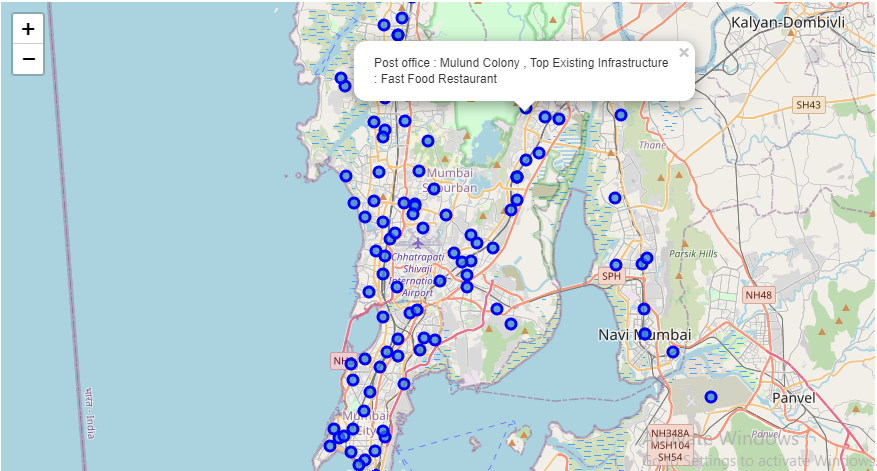

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("Result_9.png")

## 8. Feature Engineering for Business Problem

In [15]:
venues_df['VenueCategory'].unique()

array(['Brewery', 'Restaurant', 'Bookstore', 'Indian Restaurant',
       'Pizza Place', 'Dessert Shop', 'History Museum',
       'Salon / Barbershop', 'Hotel', 'Bakery', 'Café', 'Coffee Shop',
       'Bar', 'Concert Hall', 'Italian Restaurant', 'Park', 'Lounge',
       'Deli / Bodega', 'Sandwich Place', 'Clothing Store',
       'Chinese Restaurant', 'Farmers Market', 'Diner', 'Food Court',
       'Cosmetics Shop', 'Food Truck', 'Fast Food Restaurant', 'Lake',
       'Shopping Mall', 'Camera Store', 'Smoke Shop', 'Bus Station',
       'Vegetarian / Vegan Restaurant', 'Pub', 'Gym / Fitness Center',
       'Bagel Shop', 'Nightclub', 'Snack Place', 'Ice Cream Shop',
       'Pharmacy', 'Grocery Store', 'Trail', 'Multiplex',
       'Parsi Restaurant', 'Irani Cafe', 'Plaza', 'Seafood Restaurant',
       'Hostel', 'Train Station', 'Outdoors & Recreation', 'Sports Club',
       'General Entertainment', 'Gym', 'College Auditorium',
       'French Restaurant', 'Gourmet Shop', 'Salad Place',
     

In [16]:
# Quality Infrastructure 
search_query= ['Restaurant', 'Hotel', 'Farmers Market', 'Shopping Mall', 'Gym / Fitness Center', 'Pharmacy',
                         'Electronics Store', 'Indie Movie Theater', 'Light Rail Station','Metro Station', 'Train','Train Station', 'Garden',
                          'Theater','ATM', 'Office', 'Bus Station', 'Bank', 'Market' , 'Business Service', 'Monument / Landmark' ,
                          'Resort', 'Hospital', 'Police Station', 'School', 'College', 'Café' , 'Park', 'Playground',
                'Convention Center', 'College Auditorium', 'Government Building', 'Airport Terminal',
                         ]
print(len(search_query))

33


In [17]:
quality_dataframe = []
quality_dataframe= venues_df.loc[venues_df['VenueCategory'].isin(search_query)]
quality_dataframe.shape

(473, 9)

In [18]:
quality_dataframe

,Post Office,Pin Code,Latitude,Longitude,City,VenueName,VenueLatitude,VenueLongitude,VenueCategory
1,August Kranti Marg,400036,18.963549,72.809989,Mumbai,symphony,18.963347,72.810251,Restaurant
8,August Kranti Marg,400036,18.963549,72.809989,Mumbai,Krishna Palace Residency Hotel,18.962266,72.813960,Hotel
11,August Kranti Marg,400036,18.963549,72.809989,Mumbai,Moshe's,18.963438,72.807810,Café
16,August Kranti Marg,400036,18.963549,72.809989,Mumbai,August Kranti Maidan,18.963433,72.810083,Park
18,August Kranti Marg,400036,18.963549,72.809989,Mumbai,di bella,18.965556,72.807004,Café
...,...,...,...,...,...,...,...,...,...
2327,B A R C,400085,19.016700,72.850000,Mumbai,Ramee Guestline Hotel,19.017085,72.844703,Hotel
2330,B A R C,400085,19.016700,72.850000,Mumbai,wadala bus depot,19.014879,72.852001,Bus Station
2332,B A R C,400085,19.016700,72.850000,Mumbai,Agyari Gardens,19.018896,72.852526,Park
2334,Talasari,401606,19.916700,73.233300,Thane,Jawhar Bus Station,19.919062,73.230400,Bus Station


In [19]:
# one hot encoding
qualitymumbai_onehot = pd.get_dummies(quality_dataframe[['VenueCategory']], prefix="", prefix_sep="")
# add postal, borough and neighborhood column back to dataframe
qualitymumbai_onehot['Post Office'] = quality_dataframe['Post Office'] 
qualitymumbai_onehot['Pin Code'] = quality_dataframe['Pin Code'] 
qualitymumbai_onehot['City'] = quality_dataframe['City'] 

# move postal, borough and neighborhood column to the first column
fixed_columns = list(qualitymumbai_onehot.columns[-3:]) + list(qualitymumbai_onehot.columns[:-3])
qualitymumbai_onehot = qualitymumbai_onehot[fixed_columns]

print(qualitymumbai_onehot.shape)
qualitymumbai_onehot.head()
print(qualitymumbai_onehot.columns.values)

(473, 27)
['Post Office' 'Pin Code' 'City' 'Airport Terminal' 'Bank' 'Bus Station'
 'Business Service' 'Café' 'College Auditorium' 'Electronics Store'
 'Farmers Market' 'Garden' 'Government Building' 'Gym / Fitness Center'
 'Hotel' 'Indie Movie Theater' 'Light Rail Station' 'Market'
 'Monument / Landmark' 'Park' 'Pharmacy' 'Playground' 'Resort'
 'Restaurant' 'Shopping Mall' 'Theater' 'Train Station']


In [20]:
qualitymumbai_grouped = qualitymumbai_onehot.groupby(["Post Office", "Pin Code", "City"]).sum().reset_index()
print(qualitymumbai_grouped.shape)
qualitymumbai_grouped.head()


(111, 27)


,Post Office,Pin Code,City,Airport Terminal,Bank,Bus Station,Business Service,Café,College Auditorium,Electronics Store,...,Market,Monument / Landmark,Park,Pharmacy,Playground,Resort,Restaurant,Shopping Mall,Theater,Train Station
0,Agashi,401301,Thane,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Airoli Mode,400708,Navi Mumbai,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Andheri (East),400069,Mumbai,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Andheri (West),400058,Mumbai,0,0,0,0,2,0,0,...,0,0,0,1,0,0,1,0,0,0
4,Anu Shakti Nagar,400094,Mumbai,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
qualitymumbai_grouped['Total infrastructure'] =  qualitymumbai_grouped[qualitymumbai_grouped.drop(['Post Office','Pin Code','City'], axis=1).columns.values].sum(axis=1)

In [22]:
qualitymumbai_grouped.shape

(111, 28)

## What are the best locations in Mumbai as per infrastructure?

In [23]:
qualitymumbai_grouped[qualitymumbai_grouped['Total infrastructure'] == qualitymumbai_grouped['Total infrastructure'].max()].transpose()

,9
Post Office,Bandra (West)
Pin Code,400050
City,Mumbai
Airport Terminal,0
Bank,0
Bus Station,0
Business Service,0
Café,10
College Auditorium,1
Electronics Store,1


## Which all areas lack the infrastructure facilities?

In [24]:
badquality = qualitymumbai_grouped[qualitymumbai_grouped['Total infrastructure'] == qualitymumbai_grouped['Total infrastructure'].min()]
badquality

,Post Office,Pin Code,City,Airport Terminal,Bank,Bus Station,Business Service,Café,College Auditorium,Electronics Store,...,Monument / Landmark,Park,Pharmacy,Playground,Resort,Restaurant,Shopping Mall,Theater,Train Station,Total infrastructure
0,Agashi,401301,Thane,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,Anu Shakti Nagar,400094,Mumbai,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
12,Bassien,401201,Thane,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
16,Bhandup (East),400042,Mumbai,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
19,Bhayander (East),401105,Thane,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
20,Boisar,401501,Thane,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
35,Ghansoli,400701,Navi Mumbai,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
43,Jacob Circle,400011,Mumbai,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
44,Jakegram,400606,Thane,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45,Jawhar,401603,Thane,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 9. Potential area for the development of infrastructure of different kinds
Looking for area in development of infrastructure in postal office.

#### 1. Write your choice of infrastructur for which postal area has highest potential 

In [25]:
yourchoiceinfra = 'Restaurant' # Select your choice of infrastructue from VenueCategory
badqualitychoice = qualitymumbai_grouped[qualitymumbai_grouped[yourchoiceinfra] == qualitymumbai_grouped[yourchoiceinfra].min()]
badqualitychoice['Post Office']

2                  Andheri (East)
4                Anu Shakti Nagar
6                         B A R C
7                  Ballard Estate
11                    Barve Nagar
                  ...            
102                         Vashi
103    Veer Jijamata Bhosle Udyan
106                      Vikhroli
109                        Wadala
110                         Worli
Name: Post Office, Length: 65, dtype: object

#### 2. Write your choice of area for which one infrastructure has highest potential

In [26]:
yourchoicearea = 'Mantralaya'   # Change with the name of postal area where you want to see potential
infraqualitychoice = qualitymumbai_grouped[qualitymumbai_grouped['Post Office'] == yourchoicearea].transpose()
infraqualitychoice = infraqualitychoice.reset_index()

In [27]:
# making data frame from csv file 
print("These are infrastructures with highest potential in" , yourchoicearea, "area : " )
for i in range(len(infraqualitychoice)) : 
    if (infraqualitychoice.iloc[i, 1] == 0):
        print(infraqualitychoice.iloc[i, 0]) 

These are infrastructures with highest potential in Mantralaya area : 
Airport Terminal
Bank
Bus Station
Business Service
College Auditorium
Farmers Market
Garden
Government Building
Indie Movie Theater
Light Rail Station
Market
Monument / Landmark
Park
Pharmacy
Playground
Resort
Train Station


### Recheck your choice infrastructure at your choice postal office
(Need to be done as Limitation on Range and Limit of Foursquare)

In [28]:
from pandas.io.json import json_normalize
search_query = 'School'
LIMIT = 5
radius = 500
latitude = 19.016700   # Latitude of your choice postal office from 
longitude = 72.850000  # Longitude of your choice postal office from 
VERSION = 20180604
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eb668501a4b0a0028d31527'},
 'response': {'venues': [{'id': '4f426fd2e4b0085fef97baaa',
    'name': 'Auxilium Convent School',
    'location': {'address': 'Wadala (W)',
     'crossStreet': 'Off Katrak Rd',
     'lat': 19.01620168738538,
     'lng': 72.85447591009165,
     'labeledLatLngs': [{'label': 'display',
       'lat': 19.01620168738538,
       'lng': 72.85447591009165}],
     'distance': 474,
     'postalCode': '400031',
     'cc': 'IN',
     'city': 'Mumbai',
     'state': 'Mahārāshtra',
     'country': 'India',
     'formattedAddress': ['Wadala (W) (Off Katrak Rd)',
      'Mumbai 400031',
      'Mahārāshtra',
      'India']},
    'categories': [{'id': '4bf58dd8d48988d1ab941735',
      'name': 'Student Center',
      'pluralName': 'Student Centers',
      'shortName': 'Student Center',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/studentcenter_',
       'suffix': '.png'},
      'primary': True}],
    'referralId

In [29]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


In [30]:
# keep only columns that include venue name, and anything that is associated with location
clean_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')]+ ['id']
clean_dataframe = dataframe.loc[:,clean_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
clean_dataframe['categories'] = clean_dataframe.apply(get_category_type, axis=1)

# clean column names by keeping only last term
clean_dataframe.columns = [column.split('.')[-1] for column in clean_dataframe.columns]

clean_dataframe.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Auxilium Convent School,Student Center,Wadala (W),Off Katrak Rd,19.016202,72.854476,"[{'label': 'display', 'lat': 19.01620168738538...",474,400031,IN,Mumbai,Mahārāshtra,India,"[Wadala (W) (Off Katrak Rd), Mumbai 400031, Ma...",4f426fd2e4b0085fef97baaa
1,King George School,High School,Hindu Colony,NaN,19.021661,72.848383,"[{'label': 'display', 'lat': 19.02166087460775...",577,NaN,IN,Mumbai,Mahārāshtra,India,"[Hindu Colony, Mumbai, Mahārāshtra, India]",4dbb90906e810768bf48c704
2,School,Law School,NaN,NaN,19.013098,72.849128,"[{'label': 'display', 'lat': 19.01309812095294...",411,NaN,IN,Mumbai,Mahārāshtra,India,"[Mumbai, Mahārāshtra, India]",4f19aa3be4b0a9e6db8d7446
3,Good Luck Motor Training School,Automotive Shop,NaN,NaN,19.016811,72.846860,"[{'label': 'display', 'lat': 19.01681065035709...",330,NaN,IN,NaN,NaN,India,[India],51bfeeee498e9cf446697ed5
4,Dadar Parsee Youths Assembly High School,College Academic Building,"Dadar Parsi Colony, Dadar East",NaN,19.017843,72.852982,"[{'label': 'display', 'lat': 19.01784324645996...",338,400014,IN,Mumbai,Mahārāshtra,India,"[Dadar Parsi Colony, Dadar East, Mumbai 400014...",52f4ef6511d2b5a364b6975a


## 10. Best place to stay within a city for vital infrastructure facilities

In [34]:
quality_infra_mumbai2 = pd.read_csv('essentialinfra.csv',index_col='Unnamed: 0')
quality_infra_mumbai2.head()

,Post Office,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,August Kranti Marg,18.963549,72.809989,Cumballa Hill Heart hospital,18.963778,72.809091,Emergency Room
1,Andheri (East),19.115883,72.854202,criticare hospital,19.118263,72.850639,Hospital
2,Andheri (West),19.117249,72.833968,Sujay Hospital,19.115915,72.834270,Hospital
3,Antop Hill,19.020761,72.865256,sai hospital,19.023059,72.862824,Hospital
4,Ballard Estate,18.936651,72.839132,Seaman Hospital,18.936524,72.839380,Medical Center


## OR FIND ALL THE SEARCH QUERY IN ALL POSTAL OFFICE 

In [32]:
search_query2= ['Hospital','Food', 'Hotel', 'Shopping Mall', 'Pharmacy', 
                         'Metro Station', 'Train Station', 'ATM', 'Office', 'Bus Station', 'Bank', 'Market' ,
                          'Police Station', 'School', 'College & University', 'Park'
 ]
categoryId = ['4bf58dd8d48988d104941735','4d4b7105d754a06374d81259', '4bf58dd8d48988d1fa931735', '4bf58dd8d48988d1fd941735', '4bf58dd8d48988d10f951735', 
             '4bf58dd8d48988d1fd931735', '4bf58dd8d48988d129951735', '52f2ab2ebcbc57f1066b8b56', '4bf58dd8d48988d124941735','4bf58dd8d48988d1fe931735',
             '4bf58dd8d48988d10a951735', '50be8ee891d4fa8dcc7199a7','4bf58dd8d48988d12e941735', '4bf58dd8d48988d13b941735', '4d4b7105d754a06372d81259',
             '4bf58dd8d48988d163941735']

In [33]:
from pandas.io.json import json_normalize
radius = 500
VERSION = 20180604
# Quality Infrastructure 
search_query2 = 'Park'
categoryId = '4bf58dd8d48988d163941735'
LIMIT = 1

In [44]:
def getNearbyVenues(names, lat1, long1, radius):
    venues_list=[]
    for name, lat, lng in zip(names, lat1, long1):

        # create the API request URL
        url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}&locale={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query2, radius, LIMIT,  'en', categoryId)
        # make the GET request
        results = requests.get(url1).json()["response"]["venues"]
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],
            v['categories'][0]['name']) for v in results])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])

    return(nearby_venues)

In [45]:
names=clean_df['Post Office']
latitudes=clean_df['Latitude']
longitudes=clean_df['Longitude']
all_venues = getNearbyVenues(names,latitudes, longitudes, radius )

In [46]:
# convert the venues list into a new DataFrame
# define the column names
all_venues.columns = ['Post Office','Latitude', 'Longitude','VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(all_venues.shape)
all_venues.head()

(23, 7)


,Post Office,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Bandra (West),19.058336,72.830267,D'Monte Park Recreation Centre,19.059630,72.825995,Event Space
1,Bangur Nagar,19.168814,72.833678,Jogger's park,19.164701,72.835153,Park
2,Colaba,18.915091,72.825969,Harish Mahindra Children's Park,18.914867,72.823688,Park
3,Cumballa Hill,18.969307,72.806538,"Amarsons Park, Breach Candy",18.972317,72.806327,Park
4,Ghatkopar (West),19.089719,72.904597,"Joggers park,L B S marg. Ghatkopar west",19.087582,72.901977,Park


Done for Hospital, Food, Hotel, Shopping Mall, Pharmacy,Metro Station, Train Station, ATM, Office, Bus Station,
Bank,Market, Police Station, School, College, Park

In [47]:
quality_infra_mumbai = all_venues.copy()


In [48]:
#quality_infra_mumbai2 = quality_infra_mumbai.copy()

In [49]:
quality_infra_mumbai2 = quality_infra_mumbai2.append(quality_infra_mumbai, ignore_index = True)
quality_infra_mumbai2.shape

(1019, 7)

In [35]:
quality_infra_mumbai2.tail(30)

,Post Office,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
989,JNPT Town Ship,18.938771,72.835335,Government Dental College,18.939510,72.836700,College Academic Building
990,Nerul Mode,19.047375,73.019300,Dr. D Y Patil Dental College & Hospital,19.045169,73.024025,Medical School
991,Ganeshpuri,18.938771,72.835335,Government Dental College,18.939510,72.836700,College Academic Building
992,Papdi,18.938771,72.835335,Government Dental College,18.939510,72.836700,College Academic Building
993,Vasai Road East,18.938771,72.835335,Government Dental College,18.939510,72.836700,College Academic Building
994,B A R C,19.016700,72.850000,Akbar Peerbhoy College,19.020737,72.850264,College Communications Building
995,NAD Karanja,19.077800,72.894400,"S K Somaiya College of Arts, Science And Commerce",19.077490,72.899439,College Academic Building
996,Bandra (West),19.058336,72.830267,D'Monte Park Recreation Centre,19.059630,72.825995,Event Space
997,Bangur Nagar,19.168814,72.833678,Jogger's park,19.164701,72.835153,Park
998,Colaba,18.915091,72.825969,Harish Mahindra Children's Park,18.914867,72.823688,Park


In [51]:
quality_infra_mumbai2.to_csv('essentialinfra.csv')

## CLUSTERING THE IMPORTED DATASET 

In [36]:
quality_infra_mumbai2['VenueCategory'].unique()

array(['Emergency Room', 'Hospital', 'Medical Center', 'Eye Doctor',
       'Veterinarian', "Doctor's Office", 'Bus Line', 'Sandwich Place',
       'Fast Food Restaurant', 'Fried Chicken Joint', 'Bagel Shop',
       'Snack Place', 'Seafood Restaurant', 'Indian Restaurant',
       'Food Court', 'Chinese Restaurant', 'Food Truck', 'Cafeteria',
       'Pizza Place', 'Café', 'Middle Eastern Restaurant',
       'Vegetarian / Vegan Restaurant', 'Asian Restaurant', 'Restaurant',
       'Deli / Bodega', 'Burger Joint', 'Breakfast Spot',
       'Comfort Food Restaurant', 'Dessert Shop', 'Hotel',
       'Bed & Breakfast', 'Motel', 'Boarding House', 'Resort', 'Hostel',
       'Shopping Mall', 'Building', 'Pharmacy', 'Light Rail Station',
       'Metro Station', 'Train Station', 'Platform', 'Train', 'ATM',
       'Bank', 'Campaign Office', 'Office', 'Coworking Space',
       'Tech Startup', 'Conference Room', 'Bus Station', 'Market',
       'Flea Market', 'Police Station', 'High School',
       'E

In [37]:
# one hot encoding
quality_mumbai_onehot = pd.get_dummies(quality_infra_mumbai2[['VenueCategory']], prefix="", prefix_sep="")

# add postal, borough and neighborhood column back to dataframe
quality_mumbai_onehot['Post Office'] = quality_infra_mumbai2['Post Office'] 

# move postal, borough and neighborhood column to the first column
fixed_columns = list(quality_mumbai_onehot.columns[-1:]) + list(quality_mumbai_onehot.columns[:-1])
quality_mumbai_onehot = quality_mumbai_onehot[fixed_columns]

print(quality_mumbai_onehot.shape)
quality_mumbai_onehot.head()

(1019, 81)


,Post Office,ATM,Adult Education Center,Asian Restaurant,Bagel Shop,Bank,Bed & Breakfast,Boarding House,Breakfast Spot,Building,...,School,Seafood Restaurant,Shopping Mall,Snack Place,Student Center,Tech Startup,Train,Train Station,Vegetarian / Vegan Restaurant,Veterinarian
0,August Kranti Marg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Andheri (East),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Andheri (West),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Antop Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ballard Estate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
qualitymumbai_grouped = quality_mumbai_onehot.groupby(["Post Office"]).sum().reset_index()

print(qualitymumbai_grouped.shape)
qualitymumbai_grouped.head()


(122, 81)


,Post Office,ATM,Adult Education Center,Asian Restaurant,Bagel Shop,Bank,Bed & Breakfast,Boarding House,Breakfast Spot,Building,...,School,Seafood Restaurant,Shopping Mall,Snack Place,Student Center,Tech Startup,Train,Train Station,Vegetarian / Vegan Restaurant,Veterinarian
0,Aarey Milk Colony,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Airoli Mode,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Andheri (East),1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andheri (West),1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Antop Hill,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
qualitymumbai_grouped['Total infrastructure'] =  qualitymumbai_grouped[qualitymumbai_grouped.drop(['Post Office'], axis=1).columns.values].sum(axis=1)

In [40]:
qualitymumbai_groupedmax = qualitymumbai_grouped[qualitymumbai_grouped['Total infrastructure'] == qualitymumbai_grouped['Total infrastructure'].max()]
print("Best place to stay within a city for vital infrastructure facilities :")
qualitymumbai_groupedmax[['Post Office', 'Total infrastructure']]
print(qualitymumbai_groupedmax.shape)

Best place to stay within a city for vital infrastructure facilities :
(19, 82)


In [41]:
mumbai_merged2 = qualitymumbai_grouped.copy()
mumbai_merged2 = mumbai_merged2.join(clean_df[["Pin Code",'Latitude', 'Longitude', "Post Office" ]].set_index("Post Office"), on="Post Office")


In [42]:
fixed_columns = list(mumbai_merged2.columns[-3:]) + list(mumbai_merged2.columns[:-3])
mumbai_merged2 = mumbai_merged2[fixed_columns]

print(mumbai_merged2.shape)
mumbai_merged2.head()

(122, 85)


,Pin Code,Latitude,Longitude,Post Office,ATM,Adult Education Center,Asian Restaurant,Bagel Shop,Bank,Bed & Breakfast,...,Seafood Restaurant,Shopping Mall,Snack Place,Student Center,Tech Startup,Train,Train Station,Vegetarian / Vegan Restaurant,Veterinarian,Total infrastructure
0,400065,19.156129,72.870722,Aarey Milk Colony,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,400708,19.172979,73.003532,Airoli Mode,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,400069,19.115883,72.854202,Andheri (East),1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,8
3,400058,19.117249,72.833968,Andheri (West),1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,9
4,400037,19.020761,72.865256,Antop Hill,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,6


In [43]:
# set number of clusters
kclusters = 3

mumbai_2_grouped_clustering = mumbai_merged2[["Total infrastructure"]]

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mumbai_2_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 2, 2, 2, 1, 1, 2, 2, 1], dtype=int32)

In [44]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
mumbai_mergedfinal = mumbai_merged2.copy()
# add clustering labels
mumbai_mergedfinal["Cluster Labels"] = kmeans.labels_
print(mumbai_mergedfinal.shape)
mumbai_mergedfinal.head() # check the last columns!

(122, 86)


,Pin Code,Latitude,Longitude,Post Office,ATM,Adult Education Center,Asian Restaurant,Bagel Shop,Bank,Bed & Breakfast,...,Shopping Mall,Snack Place,Student Center,Tech Startup,Train,Train Station,Vegetarian / Vegan Restaurant,Veterinarian,Total infrastructure,Cluster Labels
0,400065,19.156129,72.870722,Aarey Milk Colony,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,400708,19.172979,73.003532,Airoli Mode,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
2,400069,19.115883,72.854202,Andheri (East),1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,8,2
3,400058,19.117249,72.833968,Andheri (West),1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,9,2
4,400037,19.020761,72.865256,Antop Hill,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,6,2


## 11. Exploratory Visualization 2

In [45]:
# Set manually to get proper fit in the map
address = 'Mumbai'
latitude = 19.0760
longitude = 72.8777
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Mumbai are 19.076, 72.8777.


In [46]:
map_clusters  = folium.Map(location=[latitude, longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
rainbow = [    'red',    'blue',    'orange',    'darkgreen',    'darkblue',    'black']
# add markers to map
markers_colors = []
for lat, lng, label1,common, cluster in zip(mumbai_mergedfinal['Latitude'], mumbai_mergedfinal['Longitude'], mumbai_mergedfinal['Post Office'],mumbai_mergedfinal['Total infrastructure'] , mumbai_mergedfinal['Cluster Labels']):
    labelnew =  'Post office : {} , Total infrastructure : {}'.format(label1,common)
    label = folium.Popup( labelnew, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)
map_clusters

## CLUSTERING THE IMPORTED DATASET 

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "Result_7.png")

## 12. Examine Clusters
#### Cluster 0

In [48]:
mumbai_mergedfinal.loc[mumbai_mergedfinal['Cluster Labels'] == 0]

,Pin Code,Latitude,Longitude,Post Office,ATM,Adult Education Center,Asian Restaurant,Bagel Shop,Bank,Bed & Breakfast,...,Shopping Mall,Snack Place,Student Center,Tech Startup,Train,Train Station,Vegetarian / Vegan Restaurant,Veterinarian,Total infrastructure,Cluster Labels
12,400050,19.058336,72.830267,Bandra (West),1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,11,0
18,400028,18.938771,72.835335,Bhavani Shankar Road,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,13,0
24,400093,19.115287,72.861808,Chakala MIDC,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,11,0
25,400071,19.061213,72.897591,Chembur,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,11,0
28,400039,18.938771,72.835335,Council Hall,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,13,0
29,400026,18.969307,72.806538,Cumballa Hill,1,0,0,0,1,0,...,1,1,0,0,0,0,0,0,13,0
30,400014,19.019282,72.842876,Dadar,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,13,0
34,400074,18.938771,72.835335,F C I Mumbai,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,13,0
35,401206,18.938771,72.835335,Ganeshpuri,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,13,0
37,400086,19.089719,72.904597,Ghatkopar (West),1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,12,0


## Cluster 1

In [49]:
mumbai_mergedfinal.loc[mumbai_mergedfinal['Cluster Labels'] == 1]

,Pin Code,Latitude,Longitude,Post Office,ATM,Adult Education Center,Asian Restaurant,Bagel Shop,Bank,Bed & Breakfast,...,Shopping Mall,Snack Place,Student Center,Tech Startup,Train,Train Station,Vegetarian / Vegan Restaurant,Veterinarian,Total infrastructure,Cluster Labels
0,400065,19.156129,72.870722,Aarey Milk Colony,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,400708,19.172979,73.003532,Airoli Mode,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
5,400094,19.037528,72.928146,Anu Shakti Nagar,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
6,401302,19.202322,73.002537,Arnala,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,4,1
9,400608,19.202322,73.002537,Balcum,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,4,1
14,400084,19.095283,72.900178,Barve Nagar,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
17,400042,19.148557,72.947066,Bhandup (East),1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4,1
19,401101,19.197152,72.811366,Bhayandar,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
36,400701,19.119331,72.999510,Ghansoli,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,5,1
46,400011,18.981053,72.826786,Jacob Circle,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,4,1


## Cluster 2

In [65]:
mumbai_mergedfinal.loc[mumbai_mergedfinal['Cluster Labels'] == 2]

,Pin Code,Latitude,Longitude,Post Office,ATM,Adult Education Center,Asian Restaurant,Bagel Shop,Bank,Bed & Breakfast,...,Shopping Mall,Snack Place,Student Center,Tech Startup,Train,Train Station,Vegetarian / Vegan Restaurant,Veterinarian,Total infrastructure,Cluster Labels
2,400069,19.115883,72.854202,Andheri (East),1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,8,2
3,400058,19.117249,72.833968,Andheri (West),1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,9,2
4,400037,19.020761,72.865256,Antop Hill,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,6,2
7,400036,18.963549,72.809989,August Kranti Marg,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,10,2
8,400085,19.016700,72.850000,B A R C,1,0,0,0,1,0,...,0,1,1,0,0,0,0,0,10,2
10,400038,18.936651,72.839132,Ballard Estate,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,9,2
11,400051,19.061657,72.849811,Bandra (East),1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,10,2
13,400090,19.168814,72.833678,Bangur Nagar,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,7,2
15,400611,19.018987,73.039095,Belapur,0,0,0,0,2,0,...,0,0,0,0,0,1,0,0,9,2
16,400078,19.143868,72.938433,Bhandup,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,10,2


## 13. Observations:

Most of the infrastructures are concentrated in the Southern areas of Mumbai city, with the highest number in cluster 0 and moderate number in cluster 2. On the other hand, cluster 1 has a very low number of infrastructures in the neighborhoods. This represents a great opportunity and high potential areas to open new infrastructures as it is very little to no competition from existing varied infrastructures. Meanwhile, one can specifically check the infrastructure of choice against the postal office choice area.

A person who is planning to build infrastructure with unique selling propositions and lives prosperously to stand out from the competition can also open new infrastructures in neighborhoods in cluster 2 with moderate competition and supporting adequate no. of infrastructures. Lastly, people with planning to settle in the city are advised to start in cluster 0 which already has a high concentration of infrastructures.

## 14. Acknowledgement

#### Conclusion: 
In this project, I have gone through the process of identifying the business problems, specifying the data required, extracting and preparing the data, visualizing the results, performing machine learning by clustering the data into 3 clusters based on their frequency similarities, tackling and reaching to a definitive solution to business problems (mentioned in results). Lastly, the project is providing recommendations to the relevant stakeholders i.e. business developers regarding the best locations to open a new infrastructure. The project also provides visitors and immigrants to the city regarding postal office areas for growth and living prosperously.

Report Link: https://github.com/RohitLearner/IBM-Applied-D.S-Capstone-Project/blob/master/Week%205/Week%205%20Final%20Report.pdf

Presentation Link: https://github.com/RohitLearner/IBM-Applied-D.S-Capstone-Project/blob/master/Week%205/Coursera%20Capstone%20Final%20Presentation.pdf 

